In [1]:
# SVM Classification
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('forestfires.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.head(20)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


<AxesSubplot:ylabel='size_category'>

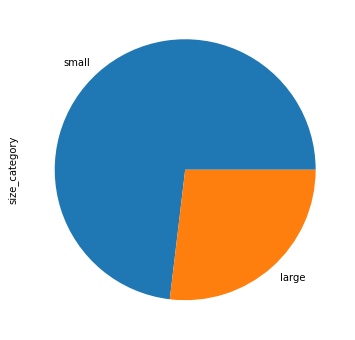

In [5]:
plt.figure(figsize=(10,6))
df["size_category"].value_counts().plot(kind="pie")

In [6]:
df['size_category']= df['size_category'].astype('category') # will convert column to category
df['size_category']= df['size_category'].cat.codes # Encoding the column

df['month']= df['month'].astype('category') # will convert column to category
df['month']= df['month'].cat.codes # Encoding the column


df['day']= df['day'].astype('category') # will convert column to category
df['day']= df['day'].cat.codes # Encoding the column

In [7]:
pd.set_option('display.max_rows', None)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
df[df.duplicated()]# Prints the duplicated rows

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,1,6,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
100,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1
215,7,2,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,0
303,6,0,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,1
426,1,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,1
461,1,2,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
501,1,5,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,1
508,1,0,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_cleaned=df.drop_duplicates() # to drop the duplicate rows

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int8   
 1   day            509 non-null    int8   
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [11]:
for i in df_cleaned.columns[11:30]:
    data_cleaned2 = df_cleaned.drop(i, axis=1, inplace=True)

In [12]:
df_cleaned.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int8   
 1   day            509 non-null    int8   
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    int8   
dtypes: float64(8), int64(1), int8(3)
memory usage: 41.3 KB


<AxesSubplot:>

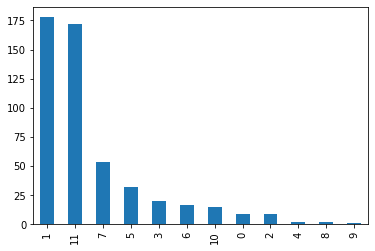

In [14]:
df_cleaned.month.value_counts().plot(kind="bar")

In [15]:
df_cleaned.size_category.value_counts()

1    371
0    138
Name: size_category, dtype: int64

<AxesSubplot:>

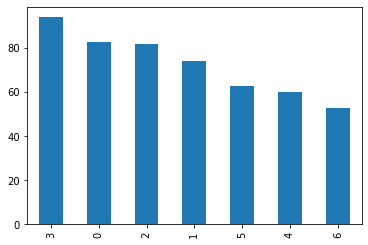

In [16]:
df_cleaned.day.value_counts().plot(kind="bar")

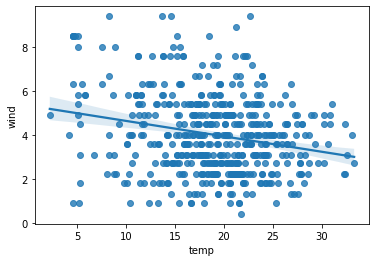

In [17]:
sns.regplot(x='temp',y='wind',data=df_cleaned);

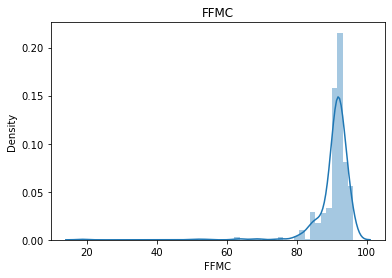

In [18]:
sns.distplot(df_cleaned.FFMC)
plt.title("FFMC");

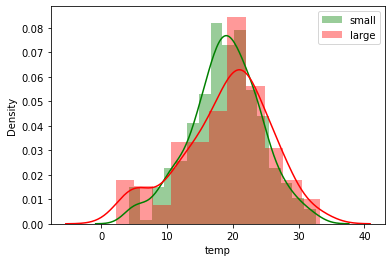

In [19]:
sns.distplot(df_cleaned[df_cleaned['size_category']==1] 
             ['temp'],
             color='g',
             label='small')

sns.distplot(df_cleaned[df_cleaned['size_category']==0] 
             ['temp'],
             color='r',
             label='large');
plt.legend()

In [20]:
names= 'month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'  
array = df_cleaned.values
X = array[:,0:11]
Y = array[:,11]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3,random_state=15)

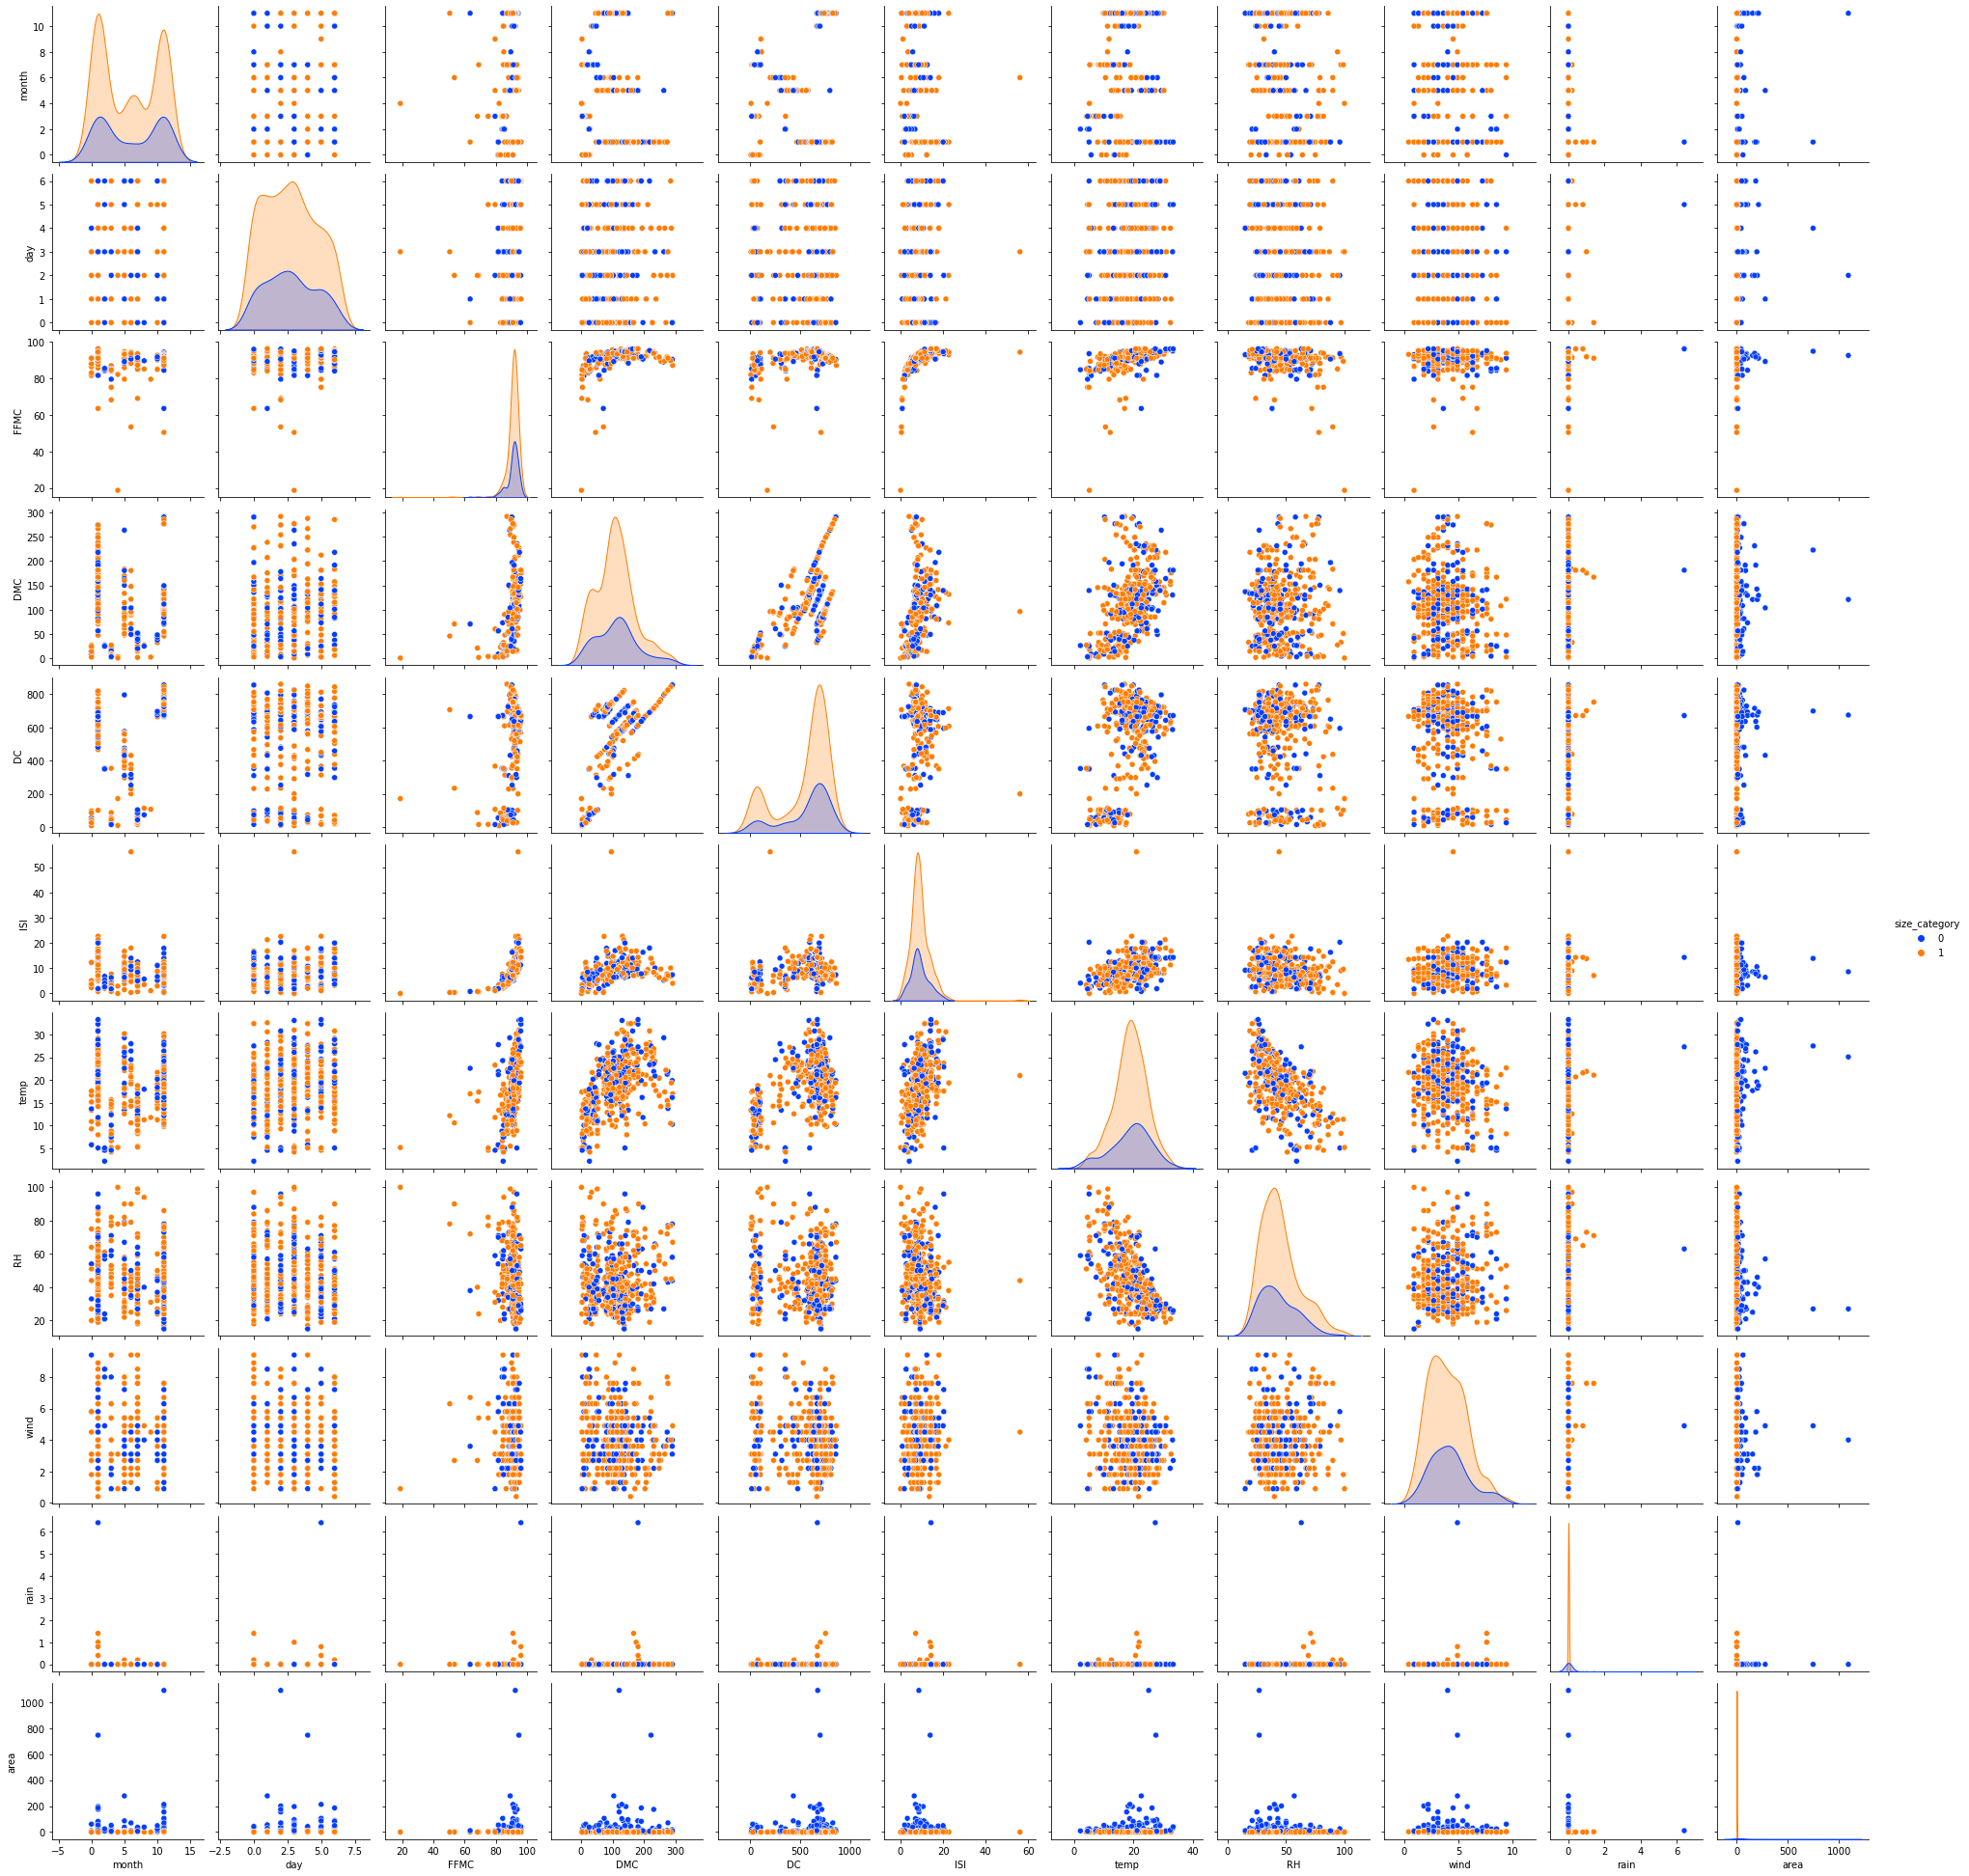

In [22]:

X = array[:,0:11]
Y = array[:,11]
sns.pairplot(df_cleaned, hue="size_category",palette="bright")

Text(0.5, 0, 'area')

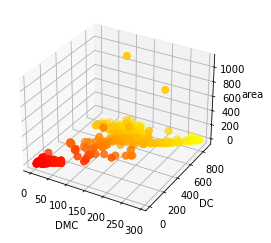

In [23]:
ax = plt.subplot(projection='3d')
ax.scatter3D(df_cleaned.DMC, df_cleaned.DC,df_cleaned.area , c=df_cleaned.DC, s=50, cmap='autumn')
ax.set_xlabel('DMC')
ax.set_ylabel('DC')
ax.set_zlabel('area')

In [24]:

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
array = df_cleaned.values
X = array[:,0:11]
Y = array[:,11]

In [25]:
## Feature Extraction
model=SelectKBest(score_func=chi2,k=3)
fit_model=model.fit(X,Y)
##Summarize scores
set_printoptions(precision=3)
print(fit_model.scores_)
features=fit_model.transform(X)


[9.876e-01 1.972e-02 1.021e-01 4.073e+01 4.599e+01 7.324e-02 9.143e-02
 4.853e+00 1.455e+00 6.237e+00 1.551e+04]


In [26]:
scores=pd.Series(data=fit_model.scores_,index=names)
scores

month        0.987647
day          0.019723
FFMC         0.102097
DMC         40.734806
DC          45.986882
ISI          0.073243
temp         0.091429
RH           4.852902
wind         1.454745
rain         6.237364
area     15510.269159
dtype: float64

In [27]:
scores.sort_values(ascending=False)

area     15510.269159
DC          45.986882
DMC         40.734806
rain         6.237364
RH           4.852902
wind         1.454745
month        0.987647
FFMC         0.102097
temp         0.091429
ISI          0.073243
day          0.019723
dtype: float64

In [28]:
## Feature Extraction with RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:

# Feature Extraction
model=LogisticRegression(max_iter=300)
rfe=RFE(model,3)
fit= rfe.fit(X,Y)

In [30]:
# Selected features
features=fit.support_
features

array([False, False,  True, False, False,  True, False, False, False,
       False,  True])

In [31]:
influencial_features=['area','DC','DMC','rain']

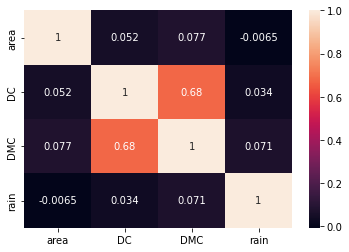

In [32]:
sns.heatmap(df_cleaned[influencial_features].corr(),annot=True);

## Grid Search CV

In [33]:
clf = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [34]:
gsv.best_params_ , gsv.best_score_ 

({'C': 12, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.8987301587301587)

In [35]:
clf = SVC(C= 12, gamma = 0.0001,kernel="rbf")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 88.23529411764706


array([[ 31,  16],
       [  2, 104]], dtype=int64)

In [36]:
clf = SVC(kernel= "linear") 
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)   

Accuracy = 99.34640522875817


array([[ 47,   0],
       [  1, 105]], dtype=int64)

## From the above analysis, we can understand that the data is linearly separable, hence linear kernel gives us a better result.
